Pittsburgh Public School Locations: https://data.wprdc.org/dataset/pittsburgh-public-school-locations

In [11]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gps
from geopy.geocoders import Nominatim
import geopy

school = pd.read_csv("https://data.wprdc.org/dataset/46fb3ca4-e844-4b42-b034-e87291d34699/resource/06664b02-c673-49d5-8a70-d3cd1c18ac8d/download/pps_schoolsapr2019publish.csv")
neighborhoods = gps.read_file("lab-9/Neighborhoods/Neighborhoods_.shp")
m_schools = gps.read_file("mygeodata/pps_schoolsapr2019publish_1-point.shp")
n = pd.read_csv("Neighborhoods_.csv")

I wanted to see if the neighborhood provides every level of education. I divided between Early, Middle, and High. The source id doesn't provide any information for what the school level is. So, I decided to search for key works in the school name, such as: K-5, 6 - 8, or high. The schools that don't have characteristic keywords will be labeled as unidentified. 

Each school will provide 1 point to the overall score. However, if the district provides all levels of education it will gain plus 2 points (since K-8 provides Early and Middle, and 6-12 provides Middle and High; I will consider the school in both categories).  

In [12]:
school.head()

,sourcedid,name,address,city,state,zip,latitude,longitude
0,9861,Allderdice Early Headstart,2409 Shady Avenue,Pittsburgh,PA,15217,40.429415,-79.919132
1,301,Allderdice High School,2409 SHADY AVE,PITTSBURGH,PA,15217,40.429416,-79.919370
2,204,Allegheny 6-8,810 ARCH ST,PITTSBURGH,PA,15212,40.453231,-80.008655
3,9863,Allegheny Early Childhood,810 ARCH STREET,Pittsburgh,PA,15212,40.453266,-80.008600
4,102,Allegheny K-5,810 ARCH ST,PITTSBURGH,PA,15212,40.453181,-80.008895


This map shows the schools in Pittsburgh.

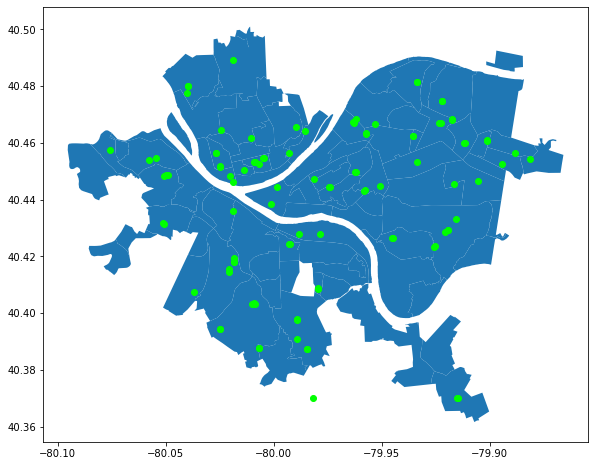

In [13]:
plt.rcParams['figure.figsize'] = [10,8]
ax = m_schools.plot(zorder=2, color="lime")
neighborhoods.plot(ax=ax, zorder=1)
plt.show() 

Early schools map:

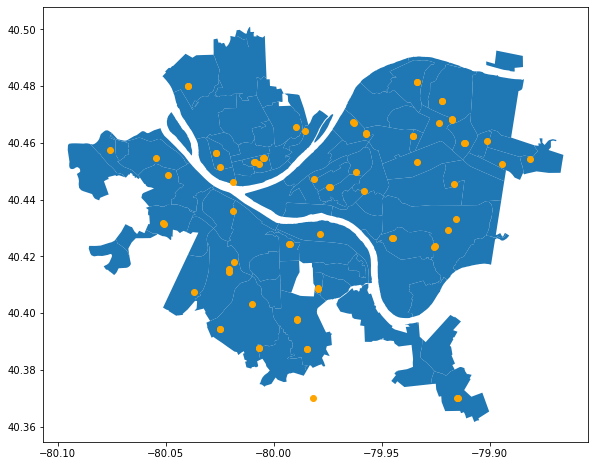

In [16]:
mask_early = m_schools[m_schools['name'].str.contains("K-5|Early|K-8")]
early = dict()
early = mask_early
early.head(10)

ax = early.plot(zorder=2, color="orange")
neighborhoods.plot(ax=ax, zorder=1)
plt.show() 

Middle schools map:

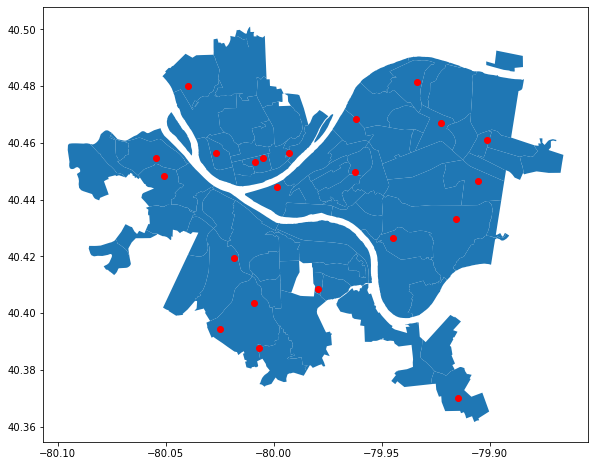

In [17]:
mask_middle = m_schools[m_schools['name'].str.contains("K-8|6-8|Middle|6-12")]
middle = dict()
middle = mask_middle
middle.head(10)

plt.rcParams['figure.figsize'] = [10,8]

ax = middle.plot(zorder=2, color="red")
neighborhoods.plot(ax=ax, zorder=1)
plt.show() 

High schools map:

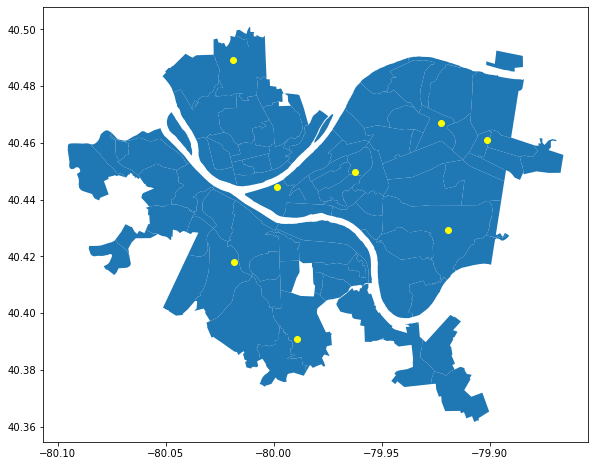

In [18]:
mask_high = m_schools[m_schools['name'].str.contains("High|6-12")]
high = dict()
high = mask_high
high.head(10)

ax = high.plot(zorder=2, color="yellow")
neighborhoods.plot(ax=ax, zorder=1)
plt.show() 

Schools that were not identified map:

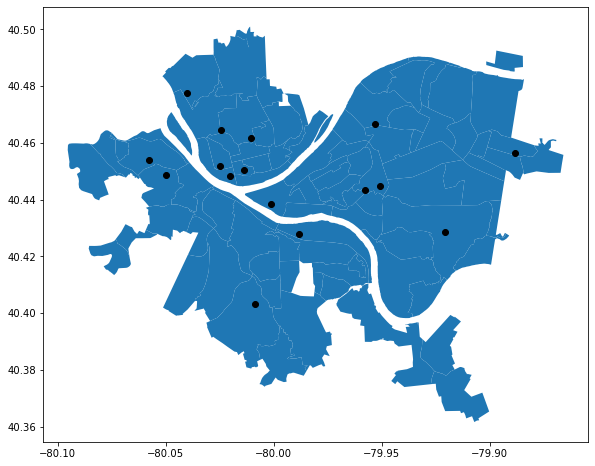

In [19]:
mask_null = m_schools[~m_schools['name'].str.contains("K-8|6-8|Middle|6-12|High|K-5|Early")]
unidentified = dict()
unidentified = mask_null
unidentified.head(10)

ax = unidentified.plot(zorder=2, color="black")
neighborhoods.plot(ax=ax, zorder=1)
plt.show() 

Scatter plot map with all different schools:

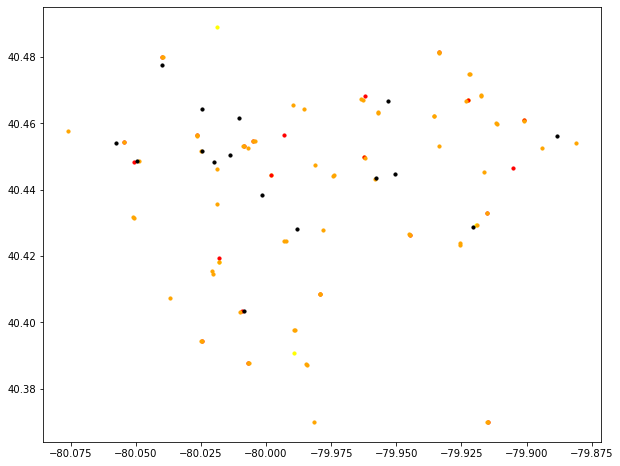

In [20]:
plt.scatter(high['longitude'], high['latitude'], color='yellow', s=10)
plt.scatter(middle['longitude'], middle['latitude'], color='red', s=10)
plt.scatter(early['longitude'], early['latitude'], color='orange', s=10)
plt.scatter(unidentified['longitude'], unidentified['latitude'], color='black', s=10)

In [115]:
geolocator = Nominatim(user_agent = "hts14")
latitudeH = []
longitudeH = []

latitudeM = []
longitudeM = []

latitudeE = []
longitudeE = []

latitudeU = []
longitudeU = []

highN = []
middleN = []
earlyN = []
unN = []

In [116]:
for lat in high["latitude"]:
    latitudeH.append(lat)
    
for long in high["longitude"]:
    longitudeH.append(long)

i = 0
while i < len(latitudeH):
    laal = "" + str(latitudeH[i]) + ", " + str(longitudeH[i]) + ""
    location = geolocator.reverse(laal)
    highN.append(location)
    i+=1
    
i = 0
hHood = []
mHood = []
eHood = []
uHood = []
nei = {"Neighborhood" : [0, 0, 0, 0]}

while i < len(highN):
    for hood in n["hood"]:
        number = highN[i][0].find(hood)
        if number > 0:
            x = nei.keys()
            if hood in x:
                nei[hood][0] = nei[hood][0] + 1
            else:
                nei.update({hood : [1, 0, 0, 0]})
    i+=1


print(nei)

{'Neighborhood': [0, 0, 0, 0], 'Squirrel Hill South': [1, 0, 0, 0], 'Beechview': [1, 0, 0, 0], 'Upper Hill': [1, 0, 0, 0], 'East Liberty': [1, 0, 0, 0], 'Perry North': [1, 0, 0, 0], 'Homewood West': [1, 0, 0, 0]}


In [117]:
for lat in middle["latitude"]:
    latitudeM.append(lat)
    
for long in middle["longitude"]:
    longitudeM.append(long)
i = 0
while i < len(latitudeM):
    laal = "" + str(latitudeM[i]) + ", " + str(longitudeM[i]) + ""
    location = geolocator.reverse(laal)
    middleN.append(location)
    i+=1

i = 0

while i < len(middleN):
    for hood in n["hood"]:
        number = middleN[i][0].find(hood)
        if number > 0:
            if hood not in mHood:
                x = nei.keys()
                if hood in x:
                    nei[hood][1] = nei[hood][1] + 1
                else:
                    nei.update({hood : [0, 1, 0, 0]})
    i+=1

print(nei)

{'Neighborhood': [0, 0, 0, 0], 'Squirrel Hill South': [1, 1, 0, 0], 'Beechview': [1, 1, 0, 0], 'Upper Hill': [1, 1, 0, 0], 'East Liberty': [1, 1, 0, 0], 'Perry North': [1, 0, 0, 0], 'Homewood West': [1, 1, 0, 0], 'Allegheny Center': [0, 2, 0, 0], 'Lower Lawrenceville': [0, 1, 0, 0], 'Brookline': [0, 2, 0, 0], 'Crafton Heights': [0, 1, 0, 0], 'Sheraden': [0, 1, 0, 0], 'Manchester': [0, 1, 0, 0], 'Lincoln Place': [0, 1, 0, 0], 'Brighton Heights': [0, 1, 0, 0], 'East Allegheny': [0, 1, 0, 0], 'Point Breeze': [0, 1, 0, 0], 'Stanton Heights': [0, 1, 0, 0]}


In [118]:
for lat in early["latitude"]:
    latitudeE.append(lat)
    
for long in early["longitude"]:
    longitudeE.append(long)
i = 0
while i < len(latitudeE):
    laal = "" + str(latitudeE[i]) + ", " + str(longitudeE[i]) + ""
    location = geolocator.reverse(laal)
    earlyN.append(location)
    i+=1
    
i = 0

while i < len(earlyN):
    for hood in n["hood"]:
        number = earlyN[i][0].find(hood)
        if number > 0:
            if hood in x:
                nei[hood][2] = nei[hood][2] + 1
            else:
                nei.update({hood : [0, 0, 1, 0]})
    i+=1
print(nei)

{'Neighborhood': [0, 0, 0, 0], 'Squirrel Hill South': [1, 1, 4, 0], 'Beechview': [1, 1, 2, 0], 'Upper Hill': [1, 1, 1, 0], 'East Liberty': [1, 1, 3, 0], 'Perry North': [1, 0, 0, 0], 'Homewood West': [1, 1, 1, 0], 'Allegheny Center': [0, 2, 5, 0], 'Lower Lawrenceville': [0, 1, 4, 0], 'Brookline': [0, 2, 3, 0], 'Crafton Heights': [0, 1, 1, 0], 'Sheraden': [0, 1, 1, 0], 'Manchester': [0, 1, 3, 0], 'Lincoln Place': [0, 1, 2, 0], 'Brighton Heights': [0, 1, 2, 0], 'East Allegheny': [0, 1, 0, 0], 'Point Breeze': [0, 1, 1, 0], 'Stanton Heights': [0, 1, 2, 0], 'Chateau': [0, 0, 1, 0], 'Windgap': [0, 0, 1, 0], 'Carrick': [0, 0, 4, 0], 'East Hills': [0, 0, 1, 0], 'Homewood South': [0, 0, 1, 0], 'Highland Park': [0, 0, 2, 0], 'Allentown': [0, 0, 2, 0], 'Shadyside': [0, 0, 1, 0], 'Larimer': [0, 0, 2, 0], 'Bedford Dwellings': [0, 0, 1, 0], 'Friendship': [0, 0, 2, 0], 'South Side Flats': [0, 0, 1, 0], 'North Oakland': [0, 0, 1, 0], 'Spring Garden': [0, 0, 1, 0], 'Spring Hill-City View': [0, 0, 1, 0],

In [119]:
for lat in unidentified["latitude"]:
    latitudeU.append(lat)
    
for long in unidentified["longitude"]:
    longitudeU.append(long)
i = 0
while i < len(latitudeU):
    laal = "" + str(latitudeU[i]) + ", " + str(longitudeU[i]) + ""
    location = geolocator.reverse(laal)
    unN.append(location)
    i+=1

i = 0
u = 0
while i < len(unN):
    for hood in n["hood"]:
        number = unN[i][0].find(hood)
        if number > 0:
            x = nei.keys()
            if hood in x:
                nei[hood][3] = nei[hood][3] + 1
            else:
                nei.update({hood : [0, 0, 0, 1]})
    i+=1
    
print(nei)

{'Neighborhood': [0, 0, 0, 0], 'Squirrel Hill South': [1, 1, 4, 1], 'Beechview': [1, 1, 2, 0], 'Upper Hill': [1, 1, 1, 0], 'East Liberty': [1, 1, 3, 0], 'Perry North': [1, 0, 0, 0], 'Homewood West': [1, 1, 1, 0], 'Allegheny Center': [0, 2, 5, 0], 'Lower Lawrenceville': [0, 1, 4, 0], 'Brookline': [0, 2, 3, 1], 'Crafton Heights': [0, 1, 1, 1], 'Sheraden': [0, 1, 1, 0], 'Manchester': [0, 1, 3, 1], 'Lincoln Place': [0, 1, 2, 0], 'Brighton Heights': [0, 1, 2, 1], 'East Allegheny': [0, 1, 0, 0], 'Point Breeze': [0, 1, 1, 0], 'Stanton Heights': [0, 1, 2, 0], 'Chateau': [0, 0, 1, 1], 'Windgap': [0, 0, 1, 0], 'Carrick': [0, 0, 4, 0], 'East Hills': [0, 0, 1, 0], 'Homewood South': [0, 0, 1, 0], 'Highland Park': [0, 0, 2, 0], 'Allentown': [0, 0, 2, 0], 'Shadyside': [0, 0, 1, 0], 'Larimer': [0, 0, 2, 0], 'Bedford Dwellings': [0, 0, 1, 0], 'Friendship': [0, 0, 2, 0], 'South Side Flats': [0, 0, 1, 1], 'North Oakland': [0, 0, 1, 2], 'Spring Garden': [0, 0, 1, 0], 'Spring Hill-City View': [0, 0, 1, 0],

Calculations:

In [129]:
calc = {}
i=0
plus =0

for hood in nei:
    if nei[hood][0] >= 1:
        if nei[hood][1] >= 1:
            if nei[hood][2] >= 1:
                plus = 2
    calc.update({hood : nei[hood][0] + nei[hood][1] + nei[hood][2] + nei[hood][3] + plus})

print(calc)

{'Neighborhood': 0, 'Squirrel Hill South': 9, 'Beechview': 6, 'Upper Hill': 5, 'East Liberty': 7, 'Perry North': 3, 'Homewood West': 5, 'Allegheny Center': 9, 'Lower Lawrenceville': 7, 'Brookline': 8, 'Crafton Heights': 5, 'Sheraden': 4, 'Manchester': 7, 'Lincoln Place': 5, 'Brighton Heights': 6, 'East Allegheny': 3, 'Point Breeze': 4, 'Stanton Heights': 5, 'Chateau': 4, 'Windgap': 3, 'Carrick': 6, 'East Hills': 3, 'Homewood South': 3, 'Highland Park': 4, 'Allentown': 4, 'Shadyside': 3, 'Larimer': 4, 'Bedford Dwellings': 3, 'Friendship': 4, 'South Side Flats': 4, 'North Oakland': 5, 'Spring Garden': 3, 'Spring Hill-City View': 3, 'Middle Hill': 4, 'Duquesne Heights': 3, 'Bloomfield': 3, 'Allegheny West': 3, 'Perry South': 3, 'Marshall-Shadeland': 3, 'Homewood North': 3}


In [132]:
dict(sorted(calc.items(), key=lambda item: item[1]))    

{'Neighborhood': 0,
 'Perry North': 3,
 'East Allegheny': 3,
 'Windgap': 3,
 'East Hills': 3,
 'Homewood South': 3,
 'Shadyside': 3,
 'Bedford Dwellings': 3,
 'Spring Garden': 3,
 'Spring Hill-City View': 3,
 'Duquesne Heights': 3,
 'Bloomfield': 3,
 'Allegheny West': 3,
 'Perry South': 3,
 'Marshall-Shadeland': 3,
 'Homewood North': 3,
 'Sheraden': 4,
 'Point Breeze': 4,
 'Chateau': 4,
 'Highland Park': 4,
 'Allentown': 4,
 'Larimer': 4,
 'Friendship': 4,
 'South Side Flats': 4,
 'Middle Hill': 4,
 'Upper Hill': 5,
 'Homewood West': 5,
 'Crafton Heights': 5,
 'Lincoln Place': 5,
 'Stanton Heights': 5,
 'North Oakland': 5,
 'Beechview': 6,
 'Brighton Heights': 6,
 'Carrick': 6,
 'East Liberty': 7,
 'Lower Lawrenceville': 7,
 'Manchester': 7,
 'Brookline': 8,
 'Squirrel Hill South': 9,
 'Allegheny Center': 9}

According to the data the best neighborhood school-wise is Squirrel Hill South and Allegheny Center.